In [1]:
import numpy as np
from garuda.ops import obb_to_aa


In [3]:
obb_label_path_1 = "../data/region_performace/bihar_0.25/labels/9301471_2893597.txt"
#read the file make list
obb_label_1=[]
with open(obb_label_path_1,'r') as file:
    for line in file:
        obb_label_1.append([float(value) for value in line.strip().split()])

print(obb_label_1)        


[[2.0, 0.126576, 0.849642, 0.138865, 0.849956, 0.13965, 0.819217, 0.127361, 0.818903], [1.0, 0.033637, 0.915543, 0.044411, 0.916645, 0.046551, 0.89573, 0.035777, 0.894628], [1.0, 0.03222, 0.915987, 0.045062, 0.917351, 0.048353, 0.886353, 0.035512, 0.884989]]


In [3]:
obb_label_path_2 = "../data/region_performace/bihar_0.25/labels/9304223_2877087.txt"
aa_label_2 = obb_to_aa(obb_label_path_2)
print(aa_label_2)

[[2.        0.0932445 0.551485  0.020385  0.034326 ]
 [2.        0.166104  0.4097685 0.023572  0.037711 ]]


0.126576
0.033637
0.03222


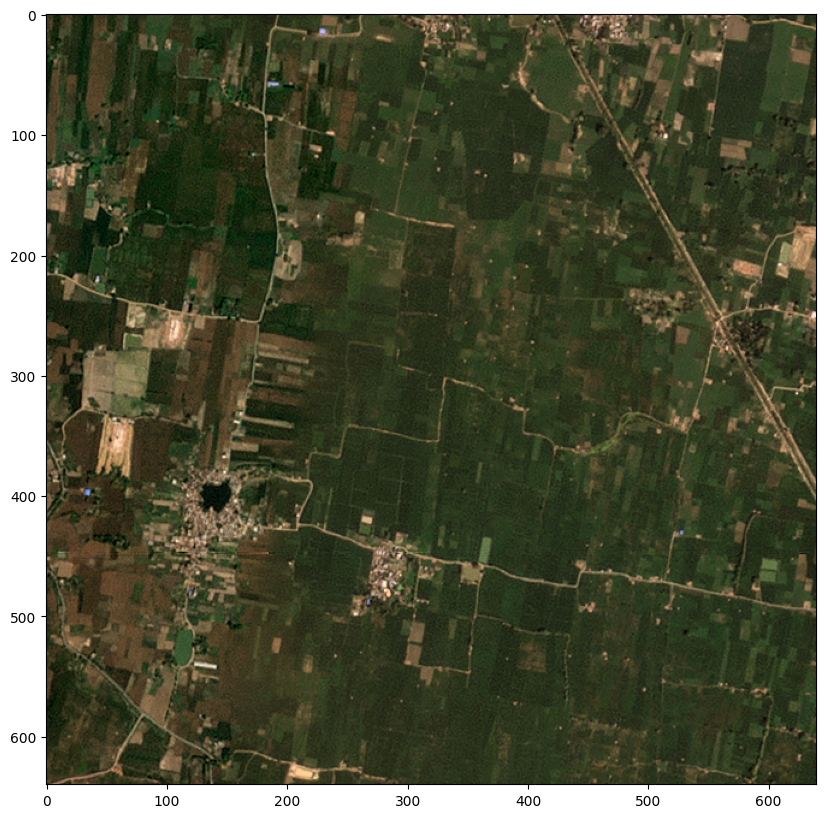

In [ ]:
import rasterio
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Path to the .tif file
tiff_file = "/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/region_performace/bihar_0.25/images/9304223_2877087.tif"
image_size=640
# Open and visualize the TIFF file
with rasterio.open(tiff_file) as src:
    red=src.read(1)
    green=src.read(2)
    blue=src.read(3)
    image = np.dstack((red, green, blue))
    img_width = src.width
    img_height = src.height
    fig, ax = plt.subplots(figsize=(10, 10))

    ax.imshow(image)
    for bbox in obb_label_1:
        class_id,x1,y1,x2,y2,x3,y3,x4,y4=bbox
        x1_1=x1*image_size
        y1_1=



    #     rect = Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')
    #     ax.add_patch(rect)

    # ax.set_title("Bounding Boxes on TIFF Image")
    # ax.set_xlabel("Width (pixels)")
    # ax.set_ylabel("Height (pixels)")
    # ax.axis("off")  # Hide axes for better visualization
    # plt.show()